# Gold and Silver Prices

The visualization illustrates the current USD price of Gold and Silver.

In [1]:
# Import notebook libraries and dependencies
import os
import requests
import pandas as pd
import numpy as np
import plotly.express as px
import alpha_vantage as av
from alpha_vantage.foreignexchange import ForeignExchange
import yfinance as yf
from fredapi import Fred

In [2]:
#Set API keys
av_api_key = os.getenv("ALPHA_VANTAGE_API_KEY")
fred_api_key = os.getenv("FRED_API_KEY")

In [3]:
# Retreive Gold/USD exchange rate 
fe = ForeignExchange(key=av_api_key)
data, _ = fe.get_currency_exchange_rate(from_currency='XAU',to_currency='USD')
data['5. Exchange Rate']=pd.to_numeric(data['5. Exchange Rate'],errors='coerce')
gold_price = round(data['5. Exchange Rate'],2)
print(f"The Price of Gold is: ${gold_price}")

The Price of Gold is: $1940.42


In [4]:
# Retreive Silver/USD exchange rate 
fe = ForeignExchange(key=av_api_key)
data, _ = fe.get_currency_exchange_rate(from_currency='XAG',to_currency='USD')
data['5. Exchange Rate']=pd.to_numeric(data['5. Exchange Rate'],errors='coerce')
silver_price = round(data['5. Exchange Rate'],2)
print(f"The Price of Silver is: ${silver_price}")

The Price of Silver is: $26.77


In [5]:
# Calculate Gold/Silver Ratio
goldsilver_ratio = round(gold_price/silver_price,2)
print(f"The Gold/Silver ratio is: {goldsilver_ratio}")

The Gold/Silver ratio is: 72.48


In [6]:
# Retreive Dow Jones Industrial Average and 
ticker = "DJIA"
ticker_data = yf.download(
    f'{ticker}', 
    period = "1d",
    interval = "1m")
djia=ticker_data['Close'][-1]
dowgold_ratio=round(djia/gold_price,2)
print(f"The Dow/Gold ratio is: {dowgold_ratio}")

[*********************100%***********************]  1 of 1 completed
The Dow/Gold ratio is: 14.39


In [18]:
#Initiate response
fred = Fred(api_key=fred_api_key)

# Retrieve Federal Reserve data
re = fred.get_series_latest_release('MSPUS')
re = pd.DataFrame(re)
re.columns=['Single Family Home Price']
re.index = pd.to_datetime(re.index)
re.index.name = 'Date'
last_re_price = re.iloc[-1]

# Calculate RE/Gold ratio
re_gold_ratio = last_re_price/gold_price
print(re_gold_ratio)

Single Family Home Price    161.408355
Name: 2020-04-01 00:00:00, dtype: float64


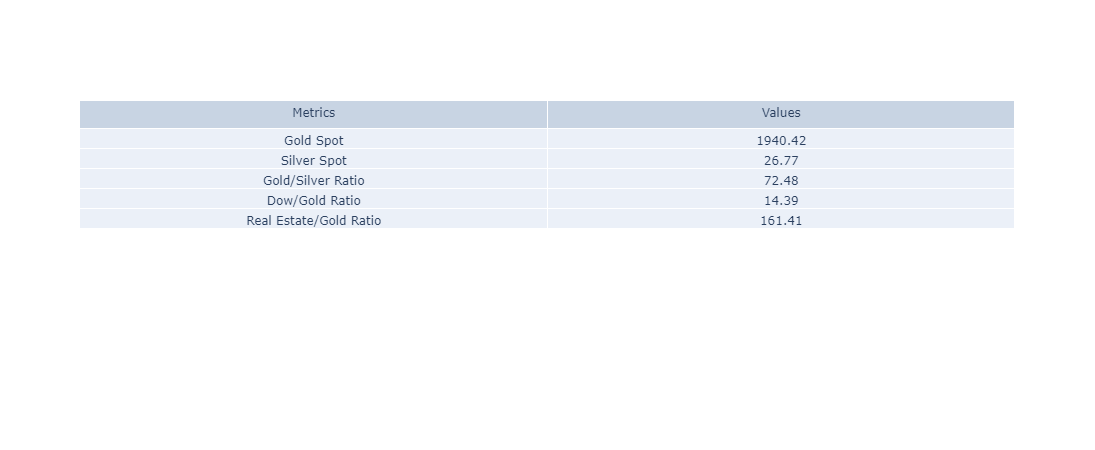

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Metrics', 'Values']),
                 cells=dict(values=[['Gold Spot', 'Silver Spot', 'Gold/Silver Ratio', 'Dow/Gold Ratio', "Real Estate/Gold Ratio"], 
                                    [gold_price, silver_price, goldsilver_ratio, dowgold_ratio, round(re_gold_ratio, 2)]]))
                     ])
fig.show()